In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [200]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [201]:
movies = pd.read_csv("/Users/mnarasap/Downloads/Movie+Assignment+Data.csv") # Write your code for importing the csv file here
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [202]:
# Write your code for inspection here
print(movies.columns)
print(movies.info())
print(movies.describe())
print(movies.shape)
print(movies.dtypes)

num_of_rows_org_df=movies.shape[0]
print(num_of_rows_org_df)

num_of_cols_org_df=movies.shape[1]
print(num_of_cols_org_df)




Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [203]:
# Write your code for column-wise null count here

print(movies.isnull().sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [204]:
# Write your code for row-wise null count here
print(movies.isnull().sum(axis=1))

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64


In [205]:
# Write your code for column-wise null percentages here

print(round(movies.isnull().sum() * 100 / len(movies.index),2))


color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64


-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [206]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations 

movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],axis=1, inplace=True)

movies.head()


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,7.1,0


-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [207]:
# Write your code for dropping the rows here

temp_1= list(movies.columns[(round(movies.isnull().sum(axis=0)/len(movies.index)*100, 2) > 5)])
#temp_1

movies = movies.dropna(subset = temp_1)
movies.head()

#rechecking if the values have changed
print(round(movies.isnull().sum()/len(movies.index)*100, 2))


#confirmed John name in director list is not there, command susccessful
movies = movies[movies.isnull().sum(axis=1) < 5]

#checking the shape after altering the dataframe, working fine
movies.shape



director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64


(3891, 13)

-  ### Subtask 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [208]:
# Write your code for filling the NaN values in the 'language' column here

movies['language'] = movies['language'].fillna('English')
movies.head()


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000


-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [209]:
# Write your code for checking number of retained rows here

movies.shape

#new_rows=movies[0]
new_rows_count=movies.shape[0]
print(new_rows_count)

new_cols_count=movies.shape[1]
print(new_cols_count)

#now lets check % of retained rows


c1 = new_rows_count/num_of_rows_org_df*100
print("number of % of retained rows are ", c1)



3891
13
number of % of retained rows are  77.15645449137418


**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [210]:
# Write your code for unit conversion here

movies['budget']=round((movies['budget']/1000000),2)
movies['gross']=round((movies['gross']/1000000),2)

movies.head()


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.40,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,200.07,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.13,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.06,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7,2012.0,6.6,24000


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [222]:
# Write your code for creating the profit column here




movies['profit']= movies['gross']- movies['budget']
movies.head()


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.51
1,Gore Verbinski,302.0,309.40,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0,9.40
2,Sam Mendes,602.0,200.07,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000,-44.93
3,Christopher Nolan,813.0,448.13,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000,198.13
5,Andrew Stanton,462.0,73.06,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7,2012.0,6.6,24000,-190.64


In [229]:
# Write your code for sorting the dataframe here


movies.sort_values(by = 'profit' , ascending = False)

#movies.head()


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.00,2009.0,7.9,33000,523.51
29,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.00,2015.0,7.0,150000,502.18
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.00,1997.0,7.7,26000,458.67
3024,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.00,1977.0,8.7,33000,449.94
3080,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.50,1982.0,7.9,34000,424.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105.0,0.41,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79.0,Japanese,2127.52,2004.0,6.9,973,-2127.11
2323,Hayao Miyazaki,174.0,2.30,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2400.00,1997.0,8.4,11000,-2397.70
3005,Lajos Koltai,73.0,0.20,Drama|Romance|War,Marcell Nagy,Fateless,5603,45.0,Hungarian,2500.00,2005.0,7.1,607,-2499.80
3859,Chan-wook Park,202.0,0.21,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131.0,Korean,4200.00,2005.0,7.7,4000,-4199.79


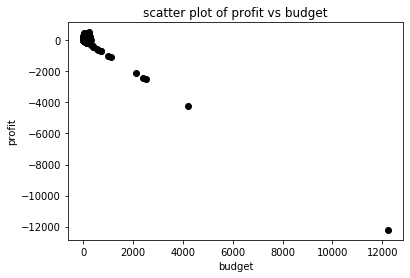

In [234]:
# Write code for profit vs budget plot here
#Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
#movies.shape


import matplotlib.pyplot as plt
#import seaborn as sns

budget_x= movies['budget']
profit_y= movies['profit']

plt.title("scatter plot of profit vs budget")
plt.xlabel("budget")
plt.ylabel("profit")

plt.scatter(budget_x,profit_y,color='k')
plt.show()

#we can see the outlier at 12000


In [231]:
# Write your code to get the top 10 profiting movies here
top10 = movies.sort_values(by = 'profit', ascending = False).head(10).reset_index(drop=True) 
top10



,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.51
1,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.18
2,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.67
3,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.94
4,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.45
5,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.28
6,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.28
7,Roger Allers,186.0,422.78,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.78
8,George Lucas,320.0,474.54,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.54
9,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.32


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [235]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(subset=['movie_title'], inplace = True)


In [238]:
# Write code for repeating subtask 2 here
top10 = movies.sort_values(by = 'profit', ascending = False).head(10).reset_index(drop=True)
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.51
1,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.18
2,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.67
3,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.94
4,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.45
5,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.28
6,Roger Allers,186.0,422.78,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.78
7,George Lucas,320.0,474.54,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.54
8,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.32
9,Gary Ross,673.0,408.00,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,330.00


**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [239]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'


IMDb_Top_250 = movies[movies.num_voted_users > 25000].sort_values(by = 'imdb_score', ascending=False).head(250)
IMDb_Top_250['Rank']=list(range(1, 251))
IMDb_Top_250.head()



,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
1937,Frank Darabont,199.0,28.34,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,3.34,1
3466,Francis Ford Coppola,208.0,134.82,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,128.82,2
66,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.32,3
2837,Francis Ford Coppola,149.0,57.30,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,44.30,4
3355,Quentin Tarantino,215.0,107.93,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,2195.0,English,8.0,1994.0,8.9,45000,99.93,5


In [240]:
Top_Foreign_Lang_Film = IMDb_Top_250[IMDb_Top_250['language'] != 'English'] # Write your code to extract top foreign language films from 'IMDb_Top_250' here
Top_Foreign_Lang_Film

#I can see 'veer-zara' in my output dataframe, worked successfully, confirmed


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
4498,Sergio Leone,181.0,6.10,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.20,1966.0,8.9,20000,4.90,8
4747,Akira Kurosawa,153.0,0.27,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596.0,Japanese,2.00,1954.0,8.7,11000,-1.73,15
4029,Fernando Meirelles,214.0,7.56,Crime|Drama,Alice Braga,City of God,533200,749.0,Portuguese,3.30,2002.0,8.7,28000,4.26,20
2373,Hayao Miyazaki,246.0,10.05,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902.0,Japanese,19.00,2001.0,8.6,28000,-8.95,24
4259,Florian Henckel von Donnersmarck,215.0,11.28,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407.0,German,2.00,2006.0,8.5,39000,9.28,35
4921,Majid Majidi,46.0,0.93,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130.0,Persian,0.18,1997.0,8.5,0,0.75,45
1329,S.S. Rajamouli,44.0,6.50,Action|Adventure|Drama|Fantasy|War,Tamannaah Bhatia,Baahubali: The Beginning,62756,410.0,Telugu,18.03,2015.0,8.4,21000,-11.53,47
4659,Asghar Farhadi,354.0,7.10,Drama|Mystery,Shahab Hosseini,A Separation,151812,264.0,Persian,0.50,2011.0,8.4,48000,6.60,50
2970,Wolfgang Petersen,96.0,11.43,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,426.0,German,14.00,1981.0,8.4,11000,-2.57,54
4105,Chan-wook Park,305.0,2.18,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809.0,Korean,3.00,2003.0,8.4,43000,-0.82,57


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [241]:
# Write your code for extracting the top 10 directors here

group_dir_name = movies.groupby('director_name')
temp_dir=group_dir_name['imdb_score'].mean().sort_values(ascending = False)

top10director = pd.DataFrame({'mean_score' : temp_dir}).reset_index().head(10)

top10director

#confirmed checkpoint 4 is correct

,director_name,mean_score
0,Charles Chaplin,8.600000
1,Tony Kaye,8.600000
2,Majid Majidi,8.500000
3,Ron Fricke,8.500000
4,Alfred Hitchcock,8.500000
5,Damien Chazelle,8.500000
6,Sergio Leone,8.433333
7,Christopher Nolan,8.425000
8,Asghar Farhadi,8.400000
9,Richard Marquand,8.400000


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [243]:
# Write your code for extracting the first two genres of each movie here
#lets take some temp value, so that it can be easy to store
temp_genre = movies['genres'].str.split(pat='|', expand=True)
movies['genre_1']=temp_genre[0]
movies['genre_2']=temp_genre[1]

movies['genre_2'] =  movies['genre_2'].fillna(movies['genre_1'])

In [244]:
movies_by_segment = movies.groupby(['genre_1', 'genre_2']) # Write your code for grouping the dataframe here

#movies_by_segment

In [245]:
PopGenre = pd.DataFrame({'Total_gross' : movies_by_segment['gross'].mean()}).reset_index()  # Write your code for getting the 5 most popular combo of genres here

PopGenre = PopGenre.sort_values(by = 'Total_gross', ascending = False).head(5)

PopGenre

#confirmed the checkpoint 5

,genre_1,genre_2,Total_gross
83,Family,Sci-Fi,434.950000
28,Adventure,Sci-Fi,228.628750
18,Adventure,Animation,115.949043
24,Adventure,Family,110.941613
1,Action,Adventure,107.880727


**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [246]:
# Write your code for creating three new dataframes here

Meryl_Streep = movies[movies['actor_1_name'] == 'Meryl Streep'] # Include all movies in which Meryl_Streep is the lead

#Meryl_Streep

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
410,Nancy Meyers,187.0,112.70,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,27.70,Comedy,Drama
1106,Curtis Hanson,42.0,46.82,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69.0,English,45.0,1994.0,6.3,0,1.82,Action,Adventure
1204,Nora Ephron,252.0,94.13,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,54.13,Biography,Drama
1408,David Frankel,208.0,124.73,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,89.73,Comedy,Drama
1483,Robert Redford,227.0,15.00,Drama|Thriller|War,Meryl Streep,Lions for Lambs,41170,298.0,English,35.0,2007.0,6.2,0,-20.00,Drama,Thriller
1575,Sydney Pollack,66.0,87.10,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200.0,English,31.0,1985.0,7.2,0,56.10,Biography,Drama
1618,David Frankel,234.0,63.54,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178.0,English,30.0,2012.0,6.3,0,33.54,Comedy,Drama
1674,Carl Franklin,64.0,23.21,Drama,Meryl Streep,One True Thing,9283,112.0,English,30.0,1998.0,7.0,592,-6.79,Drama,Drama
1925,Stephen Daldry,174.0,41.60,Drama|Romance,Meryl Streep,The Hours,102123,660.0,English,25.0,2002.0,7.6,0,16.60,Drama,Romance
2781,Phyllida Lloyd,331.0,29.96,Biography|Drama|History,Meryl Streep,The Iron Lady,82327,350.0,English,13.0,2011.0,6.4,18000,16.96,Biography,Drama


In [247]:
Leo_Caprio = movies[movies['actor_1_name'] == 'Leonardo DiCaprio']   # Include all movies in which Leo_Caprio is the lead
#Leo_Caprio




,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.67,Drama,Romance
50,Baz Luhrmann,490.0,144.81,Drama|Romance,Leonardo DiCaprio,The Great Gatsby,362912,753.0,English,105.0,2013.0,7.3,115000,39.81,Drama,Romance
97,Christopher Nolan,642.0,292.57,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803.0,English,160.0,2010.0,8.8,175000,132.57,Action,Adventure
179,Alejandro G. Iñárritu,556.0,183.64,Adventure|Drama|Thriller|Western,Leonardo DiCaprio,The Revenant,406020,1188.0,English,135.0,2015.0,8.1,190000,48.64,Adventure,Drama
257,Martin Scorsese,267.0,102.61,Biography|Drama,Leonardo DiCaprio,The Aviator,264318,799.0,English,110.0,2004.0,7.5,0,-7.39,Biography,Drama
296,Quentin Tarantino,765.0,162.80,Drama|Western,Leonardo DiCaprio,Django Unchained,955174,1193.0,English,100.0,2012.0,8.5,199000,62.80,Drama,Western
307,Edward Zwick,166.0,57.37,Adventure|Drama|Thriller,Leonardo DiCaprio,Blood Diamond,400292,657.0,English,100.0,2006.0,8.0,14000,-42.63,Adventure,Drama
308,Martin Scorsese,606.0,116.87,Biography|Comedy|Crime|Drama,Leonardo DiCaprio,The Wolf of Wall Street,780588,1138.0,English,100.0,2013.0,8.2,138000,16.87,Biography,Comedy
326,Martin Scorsese,233.0,77.68,Crime|Drama,Leonardo DiCaprio,Gangs of New York,314033,1166.0,English,100.0,2002.0,7.5,0,-22.32,Crime,Drama
361,Martin Scorsese,352.0,132.37,Crime|Drama|Thriller,Leonardo DiCaprio,The Departed,873649,2054.0,English,90.0,2006.0,8.5,29000,42.37,Crime,Drama


In [248]:
Brad_Pitt =  movies[movies['actor_1_name'] == 'Brad Pitt'] # Include all movies in which Brad_Pitt is the lead
#Brad_Pitt


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
101,David Fincher,362.0,127.49,Drama|Fantasy|Romance,Brad Pitt,The Curious Case of Benjamin Button,459346,822.0,English,150.0,2008.0,7.8,23000,-22.51,Drama,Fantasy
147,Wolfgang Petersen,220.0,133.23,Adventure,Brad Pitt,Troy,381672,1694.0,English,175.0,2004.0,7.2,0,-41.77,Adventure,Adventure
254,Steven Soderbergh,198.0,125.53,Crime|Thriller,Brad Pitt,Ocean's Twelve,284852,627.0,English,110.0,2004.0,6.4,0,15.53,Crime,Thriller
255,Doug Liman,233.0,186.34,Action|Comedy|Crime|Romance|Thriller,Brad Pitt,Mr. & Mrs. Smith,348861,798.0,English,120.0,2005.0,6.5,0,66.34,Action,Comedy
382,Tony Scott,142.0,0.03,Action|Crime|Thriller,Brad Pitt,Spy Game,121259,361.0,English,92.0,2001.0,7.0,0,-91.97,Action,Crime
400,Steven Soderbergh,186.0,183.41,Crime|Thriller,Brad Pitt,Ocean's Eleven,402645,845.0,English,85.0,2001.0,7.8,0,98.41,Crime,Thriller
470,David Ayer,406.0,85.71,Action|Drama|War,Brad Pitt,Fury,303185,701.0,English,68.0,2014.0,7.6,82000,17.71,Action,Drama
611,Jean-Jacques Annaud,76.0,37.90,Adventure|Biography|Drama|History|War,Brad Pitt,Seven Years in Tibet,96385,119.0,English,70.0,1997.0,7.0,0,-32.10,Adventure,Biography
683,David Fincher,315.0,37.02,Drama,Brad Pitt,Fight Club,1347461,2968.0,English,63.0,1999.0,8.8,48000,-25.98,Drama,Drama
792,Patrick Gilmore,98.0,26.29,Adventure|Animation|Comedy|Drama|Family|Fantas...,Brad Pitt,Sinbad: Legend of the Seven Seas,36144,91.0,English,60.0,2003.0,6.7,880,-33.71,Adventure,Animation


In [249]:
# Write your code for combining the three dataframes here
Combined = pd.concat([Meryl_Streep, Leo_Caprio, Brad_Pitt], axis = 0)
#Combined

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
410,Nancy Meyers,187.0,112.70,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,27.70,Comedy,Drama
1106,Curtis Hanson,42.0,46.82,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69.0,English,45.0,1994.0,6.3,0,1.82,Action,Adventure
1204,Nora Ephron,252.0,94.13,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,54.13,Biography,Drama
1408,David Frankel,208.0,124.73,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,89.73,Comedy,Drama
1483,Robert Redford,227.0,15.00,Drama|Thriller|War,Meryl Streep,Lions for Lambs,41170,298.0,English,35.0,2007.0,6.2,0,-20.00,Drama,Thriller
1575,Sydney Pollack,66.0,87.10,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200.0,English,31.0,1985.0,7.2,0,56.10,Biography,Drama
1618,David Frankel,234.0,63.54,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178.0,English,30.0,2012.0,6.3,0,33.54,Comedy,Drama
1674,Carl Franklin,64.0,23.21,Drama,Meryl Streep,One True Thing,9283,112.0,English,30.0,1998.0,7.0,592,-6.79,Drama,Drama
1925,Stephen Daldry,174.0,41.60,Drama|Romance,Meryl Streep,The Hours,102123,660.0,English,25.0,2002.0,7.6,0,16.60,Drama,Romance
2781,Phyllida Lloyd,331.0,29.96,Biography|Drama|History,Meryl Streep,The Iron Lady,82327,350.0,English,13.0,2011.0,6.4,18000,16.96,Biography,Drama


In [250]:
# Write your code for grouping the combined dataframe here
temp3 = Combined.groupby('actor_1_name')
#temp3

In [251]:
# Write the code for finding the mean of critic reviews and audience reviews here
temp3[['num_critic_for_reviews', 'num_user_for_reviews']].mean().sort_values(by = ['num_critic_for_reviews', 'num_user_for_reviews'], ascending = False)



**Checkpoint 6:** `Leonardo` has aced both the lists!

In [253]:
#movies['decade'] = movies.groupby('title_year')    # Write the code for calculating decade here
#movies.head()


movies['decade'] = movies['title_year']//10
#decade_temp


In [ ]:
#df_by_decade= df.groupby(df.index.title_year).sum().head()   # Write your code for creating the data frame df_by_decade here 

df_by_decade = movies.groupby('title_year').sort_values(by = ['decade'], ascending=False)


In [ ]:
# Write your code for plotting number of voted users vs decade

#matplotlib was imported earlier above


decade_x = movies['decade']
users_y = movies['num_voted_users'].sum()

plt.title("bar plot for num_of_voters vs decade")
plt.xlabel("decade")
plt.ylabel("sum of voters")

plt.bar(decade_x,users_y)
plt.show()
